In [153]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime
import seaborn
import warnings

In [154]:
# Read the file
accidents = pd.read_csv("D:\\Data analytics in business\\SEM 4\\Capstone\\NCDB_1999_to_2017.csv")

C:\Users\patel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,2,5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [155]:
# See the dataset rows
accidents.shape[0]

6772563

In [156]:
# see the dataset columns
accidents.shape[1]

23

In [157]:
# Filtering data from year 2012
accidents_new = accidents[accidents['C_YEAR']>=2012]

In [158]:
accidents_new.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
4923314,2012,01,1,10,2,01,02,03,1,3,...,01,UUUU,01,M,75,11,2,NN,1,1855036
4923315,2012,01,1,12,2,01,04,UU,1,5,...,01,UUUU,01,F,21,11,2,02,1,1855045
4923316,2012,01,1,00,2,01,03,UU,7,3,...,01,UUUU,01,F,34,11,2,02,1,1855084
4923317,2012,01,1,17,2,02,21,UU,1,1,...,01,UUUU,01,F,50,11,2,02,1,1855190
4923318,2012,01,1,17,2,02,21,UU,1,1,...,01,UUUU,01,M,63,11,1,NN,1,1855190


In [159]:
# The dataset rows after filtering from year 2012 to 2017
accidents_new.shape[0]

1849249

In [160]:
accidents_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1849249 entries, 4923314 to 6772562
Data columns (total 23 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   C_YEAR  int64 
 1   C_MNTH  object
 2   C_WDAY  object
 3   C_HOUR  object
 4   C_SEV   int64 
 5   C_VEHS  object
 6   C_CONF  object
 7   C_RCFG  object
 8   C_WTHR  object
 9   C_RSUR  object
 10  C_RALN  object
 11  C_TRAF  object
 12  V_ID    object
 13  V_TYPE  object
 14  V_YEAR  object
 15  P_ID    object
 16  P_SEX   object
 17  P_AGE   object
 18  P_PSN   object
 19  P_ISEV  object
 20  P_SAFE  object
 21  P_USER  object
 22  C_CASE  int64 
dtypes: int64(3), object(20)
memory usage: 338.6+ MB


In [161]:
# missing data in dataset
accidents_new.isnull().sum()

C_YEAR    0
C_MNTH    0
C_WDAY    0
C_HOUR    0
C_SEV     0
C_VEHS    0
C_CONF    0
C_RCFG    0
C_WTHR    0
C_RSUR    0
C_RALN    0
C_TRAF    0
V_ID      0
V_TYPE    0
V_YEAR    0
P_ID      0
P_SEX     0
P_AGE     0
P_PSN     0
P_ISEV    0
P_SAFE    0
P_USER    0
C_CASE    0
dtype: int64

In [162]:
# Selecting columns which i need to remove the unknown variables from it
data_columns = ['C_YEAR','C_MNTH','C_WDAY','C_HOUR','C_SEV','C_CONF','C_RCFG','C_WTHR','C_RSUR','C_RALN','C_TRAF','V_YEAR','P_AGE','P_ISEV','P_SAFE','P_USER','C_CASE']

In [163]:
# Replacing the unknown variables with NAN in it
accidents_new = (accidents_new.drop(data_columns, axis=1).join(accidents_new[data_columns].apply(pd.to_numeric, errors='coerce')))

In [164]:
# observing the last data
accidents_new.tail()

,C_VEHS,V_ID,V_TYPE,P_ID,P_SEX,P_PSN,C_YEAR,C_MNTH,C_WDAY,C_HOUR,...,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_YEAR,P_AGE,P_ISEV,P_SAFE,P_USER,C_CASE
6772558,UU,11,01,01,F,11,2017,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,20.0,1.0,NaN,1.0,2455828
6772559,UU,12,01,01,F,11,2017,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,47.0,1.0,NaN,1.0,2455828
6772560,UU,13,07,01,M,11,2017,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,24.0,1.0,NaN,1.0,2455828
6772561,01,01,16,01,M,96,2017,NaN,NaN,23.0,...,1.0,1.0,2.0,18.0,NaN,45.0,2.0,9.0,NaN,2570233
6772562,01,01,16,02,F,96,2017,NaN,NaN,23.0,...,1.0,1.0,2.0,18.0,NaN,45.0,2.0,9.0,NaN,2570233


In [165]:
# Removing all NAN values from it.
accidents_new_1 = accidents_new[accidents_new[data_columns].notnull().all(axis=1)]

In [166]:
accidents_new_1.shape[0]

1051219

In [167]:
accidents_new_1.tail()

,C_VEHS,V_ID,V_TYPE,P_ID,P_SEX,P_PSN,C_YEAR,C_MNTH,C_WDAY,C_HOUR,...,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_YEAR,P_AGE,P_ISEV,P_SAFE,P_USER,C_CASE
6772521,02,02,01,01,F,11,2017,12.0,7.0,18.0,...,3.0,2.0,1.0,1.0,2007.0,24.0,1.0,2.0,1.0,2569331
6772522,01,01,01,01,F,11,2017,12.0,7.0,23.0,...,2.0,5.0,4.0,18.0,1996.0,42.0,2.0,2.0,1.0,2569432
6772529,02,02,01,01,F,11,2017,12.0,7.0,19.0,...,3.0,2.0,1.0,1.0,2006.0,23.0,2.0,2.0,1.0,2569473
6772534,02,02,01,01,F,11,2017,12.0,7.0,13.0,...,2.0,1.0,1.0,1.0,2007.0,19.0,2.0,2.0,1.0,2569963
6772540,01,01,05,04,M,23,2017,12.0,7.0,22.0,...,4.0,5.0,1.0,18.0,2010.0,38.0,2.0,2.0,2.0,2570203


In [168]:
# converting the datatype of columns to integer
accidents_new_1 = accidents_new_1.astype({"C_YEAR":int,"C_MNTH":int,"C_WDAY":int,"C_HOUR":int,"C_SEV":int,"C_CONF":int,"C_RCFG":int,"C_WTHR":int,"C_RSUR":int,"C_RALN":int,"C_TRAF":int,"V_YEAR":int,"P_AGE":int,"P_ISEV":int,"P_SAFE":int,"P_USER":int,"C_CASE":int})

In [169]:
accidents_new_1.tail()

,C_VEHS,V_ID,V_TYPE,P_ID,P_SEX,P_PSN,C_YEAR,C_MNTH,C_WDAY,C_HOUR,...,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_YEAR,P_AGE,P_ISEV,P_SAFE,P_USER,C_CASE
6772521,02,02,01,01,F,11,2017,12,7,18,...,3,2,1,1,2007,24,1,2,1,2569331
6772522,01,01,01,01,F,11,2017,12,7,23,...,2,5,4,18,1996,42,2,2,1,2569432
6772529,02,02,01,01,F,11,2017,12,7,19,...,3,2,1,1,2006,23,2,2,1,2569473
6772534,02,02,01,01,F,11,2017,12,7,13,...,2,1,1,1,2007,19,2,2,1,2569963
6772540,01,01,05,04,M,23,2017,12,7,22,...,4,5,1,18,2010,38,2,2,2,2570203


In [170]:
accidents_new_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1051219 entries, 4923344 to 6772540
Data columns (total 23 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   C_VEHS  1051219 non-null  object
 1   V_ID    1051219 non-null  object
 2   V_TYPE  1051219 non-null  object
 3   P_ID    1051219 non-null  object
 4   P_SEX   1051219 non-null  object
 5   P_PSN   1051219 non-null  object
 6   C_YEAR  1051219 non-null  int32 
 7   C_MNTH  1051219 non-null  int32 
 8   C_WDAY  1051219 non-null  int32 
 9   C_HOUR  1051219 non-null  int32 
 10  C_SEV   1051219 non-null  int32 
 11  C_CONF  1051219 non-null  int32 
 12  C_RCFG  1051219 non-null  int32 
 13  C_WTHR  1051219 non-null  int32 
 14  C_RSUR  1051219 non-null  int32 
 15  C_RALN  1051219 non-null  int32 
 16  C_TRAF  1051219 non-null  int32 
 17  V_YEAR  1051219 non-null  int32 
 18  P_AGE   1051219 non-null  int32 
 19  P_ISEV  1051219 non-null  int32 
 20  P_SAFE  1051219 non-null  int32 
 21  P_

In [171]:
accidents_new_1 = accidents_new_1[accidents_new_1.P_SEX != 'U']

In [172]:
# Joining three columns to make the date column
accidents_new_1['Date'] = pd.to_datetime(dict(year=accidents_new_1.C_YEAR, month=accidents_new_1.C_MNTH, day=accidents_new_1.C_WDAY))

In [173]:
accidents_new_1.head()

,C_VEHS,V_ID,V_TYPE,P_ID,P_SEX,P_PSN,C_YEAR,C_MNTH,C_WDAY,C_HOUR,...,C_RSUR,C_RALN,C_TRAF,V_YEAR,P_AGE,P_ISEV,P_SAFE,P_USER,C_CASE,Date
4923344,02,1,01,01,M,11,2012,1,1,16,...,1,1,18,2002,67,1,2,1,1856495,2012-01-01
4923345,02,1,01,02,F,13,2012,1,1,16,...,1,1,18,2002,26,1,2,2,1856495,2012-01-01
4923346,02,1,01,03,F,21,2012,1,1,16,...,1,1,18,2002,52,2,2,2,1856495,2012-01-01
4923347,02,2,01,04,M,11,2012,1,1,16,...,1,1,18,2009,49,1,2,1,1856495,2012-01-01
4923350,02,1,01,01,F,11,2012,1,1,12,...,1,1,18,2004,29,2,2,1,1856543,2012-01-01


In [174]:
# Datetime index is set
accidents_new_1.set_index('Date', inplace=True)

In [175]:
accidents_new_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1049574 entries, 2012-01-01 to 2017-12-07
Data columns (total 23 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   C_VEHS  1049574 non-null  object
 1   V_ID    1049574 non-null  object
 2   V_TYPE  1049574 non-null  object
 3   P_ID    1049574 non-null  object
 4   P_SEX   1049574 non-null  object
 5   P_PSN   1049574 non-null  object
 6   C_YEAR  1049574 non-null  int32 
 7   C_MNTH  1049574 non-null  int32 
 8   C_WDAY  1049574 non-null  int32 
 9   C_HOUR  1049574 non-null  int32 
 10  C_SEV   1049574 non-null  int32 
 11  C_CONF  1049574 non-null  int32 
 12  C_RCFG  1049574 non-null  int32 
 13  C_WTHR  1049574 non-null  int32 
 14  C_RSUR  1049574 non-null  int32 
 15  C_RALN  1049574 non-null  int32 
 16  C_TRAF  1049574 non-null  int32 
 17  V_YEAR  1049574 non-null  int32 
 18  P_AGE   1049574 non-null  int32 
 19  P_ISEV  1049574 non-null  int32 
 20  P_SAFE  1049574 non-null  int32

In [176]:
# Rearranging the column
accidents_new_1 = accidents_new_1[['C_YEAR','C_MNTH','C_WDAY','C_HOUR','C_SEV','C_VEHS','C_CONF','C_RCFG','C_WTHR','C_RSUR','C_RALN','C_TRAF','V_ID','V_TYPE','V_YEAR','P_ID','P_SEX','P_AGE','P_PSN','P_ISEV','P_SAFE','P_USER','C_CASE']]

In [177]:
accidents_new_1.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,2012,1,1,16,2,02,35,1,1,1,...,01,2002,01,M,67,11,1,2,1,1856495
2012-01-01,2012,1,1,16,2,02,35,1,1,1,...,01,2002,02,F,26,13,1,2,2,1856495
2012-01-01,2012,1,1,16,2,02,35,1,1,1,...,01,2002,03,F,52,21,2,2,2,1856495
2012-01-01,2012,1,1,16,2,02,35,1,1,1,...,01,2009,04,M,49,11,1,2,1,1856495
2012-01-01,2012,1,1,12,2,02,35,1,1,1,...,01,2004,01,F,29,11,2,2,1,1856543


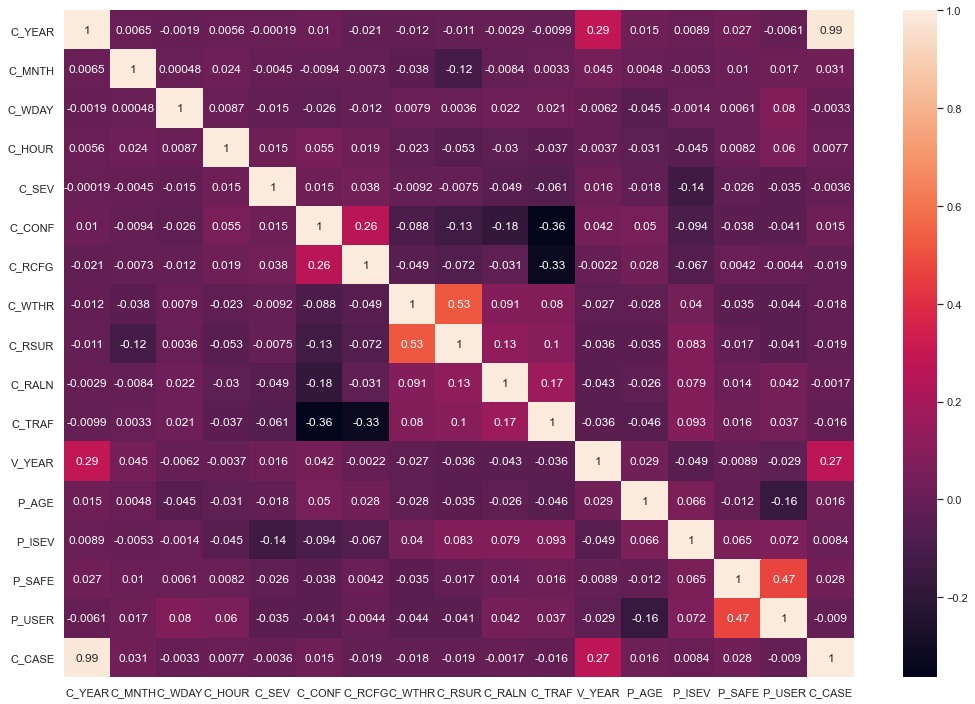

In [178]:
# correlation 
#printing the correlations
corrMatrix = accidents_new_1.corr()
seaborn.heatmap(corrMatrix, annot=True)
seaborn.set(rc={'figure.figsize':(17.7,12.27)})

In [179]:
# dropping unwanted columns
accidents_new_1 = accidents_new_1.drop(['V_ID', 'P_ID','P_PSN','C_VEHS'], axis = 1)

In [180]:
accidents_new_1.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,V_YEAR,P_SEX,P_AGE,P_ISEV,P_SAFE,P_USER,C_CASE
Date,,,,,,,,,,,,,,,,,,,
2012-01-01,2012,1,1,16,2,35,1,1,1,1,18,01,2002,M,67,1,2,1,1856495
2012-01-01,2012,1,1,16,2,35,1,1,1,1,18,01,2002,F,26,1,2,2,1856495
2012-01-01,2012,1,1,16,2,35,1,1,1,1,18,01,2002,F,52,2,2,2,1856495
2012-01-01,2012,1,1,16,2,35,1,1,1,1,18,01,2009,M,49,1,2,1,1856495
2012-01-01,2012,1,1,12,2,35,1,1,1,1,18,01,2004,F,29,2,2,1,1856543


In [181]:
# correlation 
#printing the correlations
correlations = accidents_new_1.corr()['C_SEV'].drop('C_SEV')
print(correlations*100)

C_YEAR    -0.019376
C_MNTH    -0.454852
C_WDAY    -1.543483
C_HOUR     1.472622
C_CONF     1.516204
C_RCFG     3.760021
C_WTHR    -0.916196
C_RSUR    -0.748936
C_RALN    -4.924158
C_TRAF    -6.119395
V_YEAR     1.550915
P_AGE     -1.774638
P_ISEV   -13.516527
P_SAFE    -2.555152
P_USER    -3.473087
C_CASE    -0.355713
Name: C_SEV, dtype: float64


In [182]:
# it is equivalent to if - else condition
accidents_new_1['fatal'] = np.where(accidents_new_1['C_SEV']==1,1,0)
accidents_new_1['Non_fatal'] = np.where(accidents_new_1['C_SEV'] ==2,1,0)

In [183]:
# grouping by date the fatal and non fatal accidents
accidents_new_2 = accidents_new_1.groupby('Date')['fatal','Non_fatal'].sum()

C:\Users\patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [184]:
accidents_new_2

,fatal,Non_fatal
Date,,
2012-01-01,31,2292
2012-01-02,32,2095
2012-01-03,18,1787
2012-01-04,49,2083
2012-01-05,35,2680
...,...,...
2017-12-03,26,2031
2017-12-04,29,2017
2017-12-05,70,2816


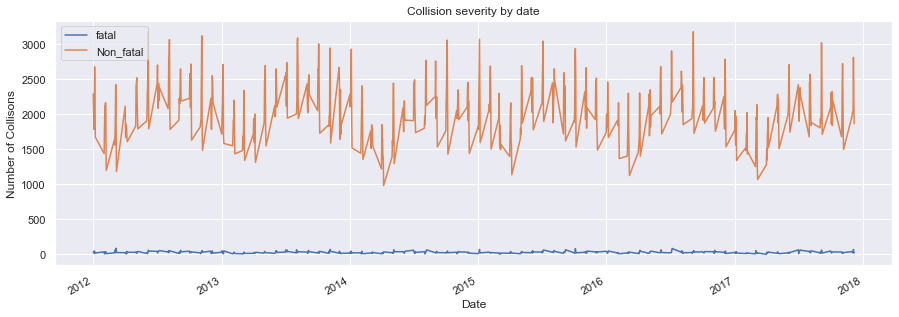

In [185]:
# plot of collision severity by date
plot1 = accidents_new_2.plot(title = "Collision severity by date", figsize = (15,5))
plot1.set_xlabel("Date")
plot1.set_ylabel("Number of Collisons");

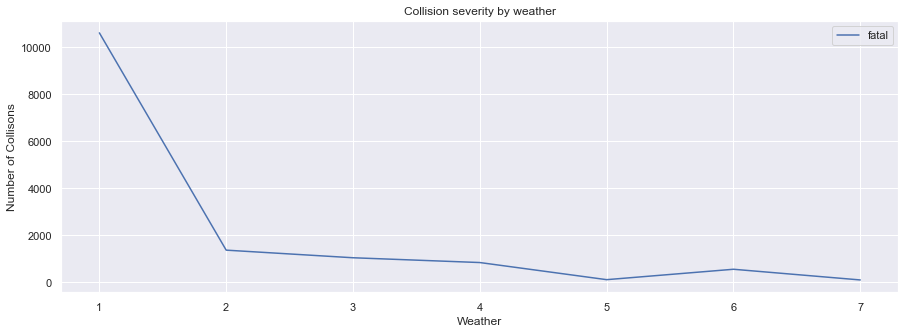

In [186]:
accidents_new_3 = accidents_new_1.groupby('C_WTHR')['fatal'].sum()
# plot of collision severity by date
plot1 = accidents_new_3.plot(title = "Collision severity by weather", figsize = (15,5))
plot1.set_xlabel("Weather")
plot1.set_ylabel("Number of Collisons");
plot1.legend()

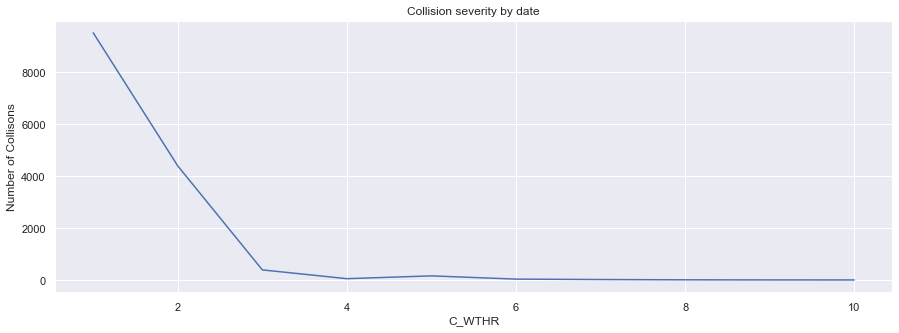

In [187]:
accidents_new_3 = accidents_new_1.groupby('C_RCFG')['fatal'].sum()
# plot of collision severity by date
plot1 = accidents_new_3.plot(title = "Collision severity by date", figsize = (15,5))
plot1.set_xlabel("C_WTHR")
plot1.set_ylabel("Number of Collisons");

Text(0.5, 1.0, 'Count of Male and female involved in accidents')

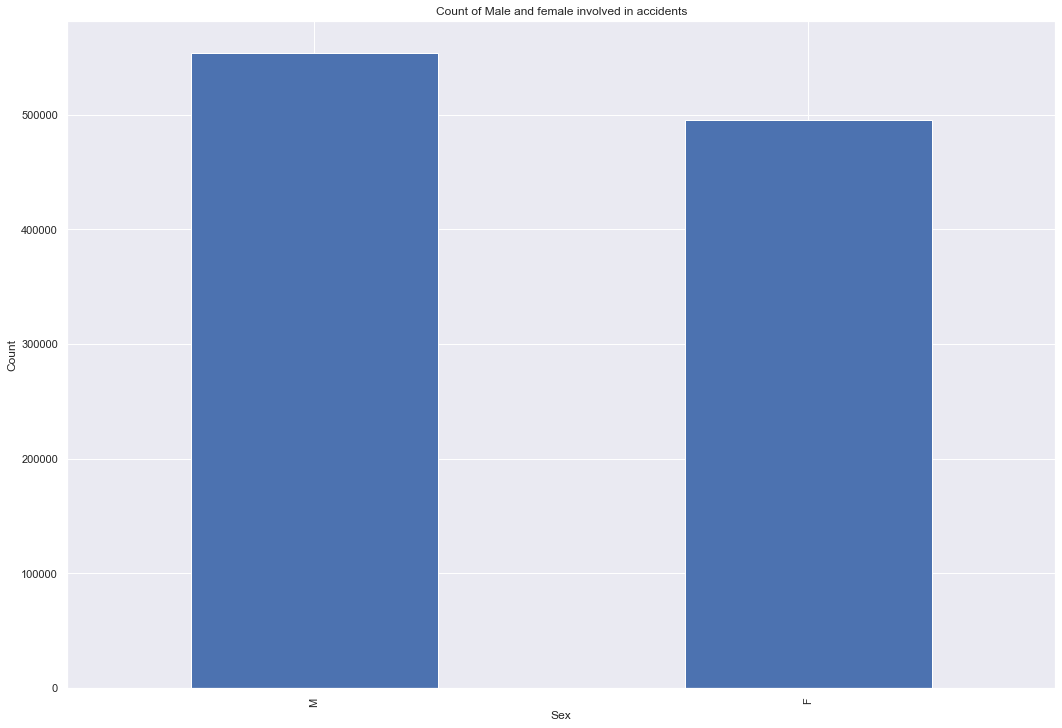

In [188]:
accidents_new_1['P_SEX'].value_counts().plot(kind='bar')
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Count of Male and female involved in accidents")

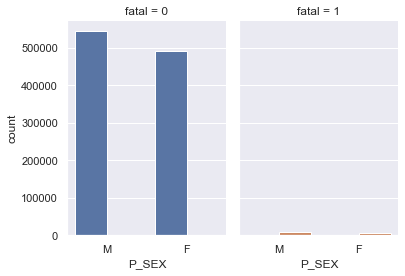

In [189]:
g = seaborn.catplot(x="P_SEX", hue="fatal", col="fatal",
                data=accidents_new_1, kind="count",
                height=4, aspect=.7);

In [190]:
accidents_new_1['P_SEX'].value_counts()

M    554095
F    495479
Name: P_SEX, dtype: int64

In [191]:
# Creating new column where P_sex would be converted in integer
accidents_new_1['PSR_SEX'] = np.where(accidents_new_1['P_SEX'] == 'M','1','0')

In [192]:
accidents_new_1.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,...,V_YEAR,P_SEX,P_AGE,P_ISEV,P_SAFE,P_USER,C_CASE,fatal,Non_fatal,PSR_SEX
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,2012,1,1,16,2,35,1,1,1,1,...,2002,M,67,1,2,1,1856495,0,1,1
2012-01-01,2012,1,1,16,2,35,1,1,1,1,...,2002,F,26,1,2,2,1856495,0,1,0
2012-01-01,2012,1,1,16,2,35,1,1,1,1,...,2002,F,52,2,2,2,1856495,0,1,0
2012-01-01,2012,1,1,16,2,35,1,1,1,1,...,2009,M,49,1,2,1,1856495,0,1,1
2012-01-01,2012,1,1,12,2,35,1,1,1,1,...,2004,F,29,2,2,1,1856543,0,1,0


In [193]:
# dropping the column
accidents_new_1 = accidents_new_1.drop(['P_SEX'], axis = 1)

In [194]:
# count of males and females in dataset "1" denotes male and "0" denotes female
accidents_new_1['PSR_SEX'].value_counts()

1    554095
0    495479
Name: PSR_SEX, dtype: int64

In [195]:
# P_ISEV dentoes the medical severity they need
accidents_new_1['P_ISEV'].value_counts()

2    588257
1    455603
3      5714
Name: P_ISEV, dtype: int64

In [196]:
# count of severity
accidents_new_1['C_SEV'].value_counts()

2    1035007
1      14567
Name: C_SEV, dtype: int64

In [197]:
# making dummies variable for P_USER using one hot encoding method
categorical=['P_USER']
accident_model=pd.get_dummies(accidents_new_1, columns=categorical)

In [198]:
accident_model.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,...,P_ISEV,P_SAFE,C_CASE,fatal,Non_fatal,PSR_SEX,P_USER_1,P_USER_2,P_USER_4,P_USER_5
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,2012,1,1,16,2,35,1,1,1,1,...,1,2,1856495,0,1,1,1,0,0,0
2012-01-01,2012,1,1,16,2,35,1,1,1,1,...,1,2,1856495,0,1,0,0,1,0,0
2012-01-01,2012,1,1,16,2,35,1,1,1,1,...,2,2,1856495,0,1,0,0,1,0,0
2012-01-01,2012,1,1,16,2,35,1,1,1,1,...,1,2,1856495,0,1,1,1,0,0,0
2012-01-01,2012,1,1,12,2,35,1,1,1,1,...,2,2,1856543,0,1,0,1,0,0,0


In [199]:
accidents_model_1 = accident_model[accident_model['C_YEAR']>=2015]

In [200]:
accidents_model_1.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,...,P_ISEV,P_SAFE,C_CASE,fatal,Non_fatal,PSR_SEX,P_USER_1,P_USER_2,P_USER_4,P_USER_5
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015,1,1,7,2,31,2,4,3,1,...,2,2,2218049,0,1,1,0,1,0,0
2015-01-01,2015,1,1,16,2,4,1,4,3,4,...,2,2,2218052,0,1,1,1,0,0,0
2015-01-01,2015,1,1,12,2,2,1,1,3,1,...,1,2,2218090,0,1,1,1,0,0,0
2015-01-01,2015,1,1,16,2,21,2,1,4,1,...,2,2,2218173,0,1,0,0,1,0,0
2015-01-01,2015,1,1,12,2,21,2,7,2,1,...,2,2,2218189,0,1,0,0,1,0,0


In [201]:
accidents_model_1 = accident_model.drop(['C_YEAR','C_MNTH','C_HOUR','C_CONF','C_RCFG','C_RSUR','C_TRAF','C_CASE','V_YEAR','V_TYPE'],axis = 1)

In [202]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [203]:
accidents_model_1[['C_WTHR','C_RALN','P_AGE','C_WDAY']] = scaler.fit_transform(accidents_model_1[['C_WTHR','C_RALN','P_AGE','C_WDAY']])

In [204]:
accident_model_2 = accidents_model_1.drop(['C_WTHR'], axis = 1)

In [205]:
accident_model_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1049574 entries, 2012-01-01 to 2017-12-07
Data columns (total 13 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   C_WDAY     1049574 non-null  float64
 1   C_SEV      1049574 non-null  int32  
 2   C_RALN     1049574 non-null  float64
 3   P_AGE      1049574 non-null  float64
 4   P_ISEV     1049574 non-null  int32  
 5   P_SAFE     1049574 non-null  int32  
 6   fatal      1049574 non-null  int32  
 7   Non_fatal  1049574 non-null  int32  
 8   PSR_SEX    1049574 non-null  object 
 9   P_USER_1   1049574 non-null  uint8  
 10  P_USER_2   1049574 non-null  uint8  
 11  P_USER_4   1049574 non-null  uint8  
 12  P_USER_5   1049574 non-null  uint8  
dtypes: float64(3), int32(5), object(1), uint8(4)
memory usage: 104.1+ MB


In [206]:
accident_model_2 = accident_model_2.astype({"PSR_SEX":int})

In [207]:
accident_model_2['C_SEV'].value_counts()

2    1035007
1      14567
Name: C_SEV, dtype: int64

In [208]:
X = accident_model_2.drop(['P_ISEV'], axis = 1)
print(X)

            C_WDAY  C_SEV  C_RALN     P_AGE  P_SAFE  fatal  Non_fatal  \
Date                                                                    
2012-01-01     0.0      2     0.0  0.673469       2      0          1   
2012-01-01     0.0      2     0.0  0.255102       2      0          1   
2012-01-01     0.0      2     0.0  0.520408       2      0          1   
2012-01-01     0.0      2     0.0  0.489796       2      0          1   
2012-01-01     0.0      2     0.0  0.285714       2      0          1   
...            ...    ...     ...       ...     ...    ...        ...   
2017-12-07     1.0      2     0.0  0.234694       2      0          1   
2017-12-07     1.0      2     0.6  0.418367       2      0          1   
2017-12-07     1.0      2     0.0  0.224490       2      0          1   
2017-12-07     1.0      2     0.0  0.183673       2      0          1   
2017-12-07     1.0      2     0.0  0.377551       2      0          1   

            PSR_SEX  P_USER_1  P_USER_2  P_USER_4 

In [209]:
y = accident_model_2['P_ISEV']

In [210]:
accident_model_2.head()

,C_WDAY,C_SEV,C_RALN,P_AGE,P_ISEV,P_SAFE,fatal,Non_fatal,PSR_SEX,P_USER_1,P_USER_2,P_USER_4,P_USER_5
Date,,,,,,,,,,,,,
2012-01-01,0.0,2,0.0,0.673469,1,2,0,1,1,1,0,0,0
2012-01-01,0.0,2,0.0,0.255102,1,2,0,1,0,0,1,0,0
2012-01-01,0.0,2,0.0,0.520408,2,2,0,1,0,0,1,0,0
2012-01-01,0.0,2,0.0,0.489796,1,2,0,1,1,1,0,0,0
2012-01-01,0.0,2,0.0,0.285714,2,2,0,1,0,1,0,0,0


In [211]:
# Splitting the data into training and test 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(penalty = 'l1', C = 1000,random_state = 0)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_train)
print('Train accuracy score:',accuracy_score(y_train,y_pred))
print('Test accuracy score:', accuracy_score(y_test,logreg.predict(X_test)))

C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train accuracy score: 0.5958294163977743
Test accuracy score: 0.5956195644717486


In [213]:
from sklearn.ensemble import RandomForestClassifier as RFC
rfc_b = RFC(n_estimators = 50)
rfc_b.fit(X_train,y_train)
y_pred = rfc_b.predict(X_train)
print('Train accuracy score:',accuracy_score(y_train,y_pred))
print('Test accuracy score:', accuracy_score(y_test,rfc_b.predict(X_test)))

Train accuracy score: 0.6326964607840646
Test accuracy score: 0.612064300250768


In [214]:
accident_model_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1049574 entries, 2012-01-01 to 2017-12-07
Data columns (total 13 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   C_WDAY     1049574 non-null  float64
 1   C_SEV      1049574 non-null  int32  
 2   C_RALN     1049574 non-null  float64
 3   P_AGE      1049574 non-null  float64
 4   P_ISEV     1049574 non-null  int32  
 5   P_SAFE     1049574 non-null  int32  
 6   fatal      1049574 non-null  int32  
 7   Non_fatal  1049574 non-null  int32  
 8   PSR_SEX    1049574 non-null  int32  
 9   P_USER_1   1049574 non-null  uint8  
 10  P_USER_2   1049574 non-null  uint8  
 11  P_USER_4   1049574 non-null  uint8  
 12  P_USER_5   1049574 non-null  uint8  
dtypes: float64(3), int32(6), uint8(4)
memory usage: 60.1 MB


In [215]:
accident_model.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,...,P_ISEV,P_SAFE,C_CASE,fatal,Non_fatal,PSR_SEX,P_USER_1,P_USER_2,P_USER_4,P_USER_5
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,2012,1,1,16,2,35,1,1,1,1,...,1,2,1856495,0,1,1,1,0,0,0
2012-01-01,2012,1,1,16,2,35,1,1,1,1,...,1,2,1856495,0,1,0,0,1,0,0
2012-01-01,2012,1,1,16,2,35,1,1,1,1,...,2,2,1856495,0,1,0,0,1,0,0
2012-01-01,2012,1,1,16,2,35,1,1,1,1,...,1,2,1856495,0,1,1,1,0,0,0
2012-01-01,2012,1,1,12,2,35,1,1,1,1,...,2,2,1856543,0,1,0,1,0,0,0


In [216]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
# split data into train and test sets
seed = 20
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 62.02%


In [217]:
accident_model_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1049574 entries, 2012-01-01 to 2017-12-07
Data columns (total 13 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   C_WDAY     1049574 non-null  float64
 1   C_SEV      1049574 non-null  int32  
 2   C_RALN     1049574 non-null  float64
 3   P_AGE      1049574 non-null  float64
 4   P_ISEV     1049574 non-null  int32  
 5   P_SAFE     1049574 non-null  int32  
 6   fatal      1049574 non-null  int32  
 7   Non_fatal  1049574 non-null  int32  
 8   PSR_SEX    1049574 non-null  int32  
 9   P_USER_1   1049574 non-null  uint8  
 10  P_USER_2   1049574 non-null  uint8  
 11  P_USER_4   1049574 non-null  uint8  
 12  P_USER_5   1049574 non-null  uint8  
dtypes: float64(3), int32(6), uint8(4)
memory usage: 60.1 MB


In [218]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import xgboost
# CV model
model = xgboost.XGBClassifier()
kfold = StratifiedKFold(n_splits=7, random_state=0)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 61.83% (0.18%)


In [219]:
#create a dataframe with all training data except the target column
train_X_2 = accident_model.drop(columns=['C_SEV'])

#check that the target variable has been removed
train_X_2.head()


from keras.utils import to_categorical
#one-hot encode target column
train_y_2 = to_categorical(accident_model.C_SEV)

#vcheck that target column has been converted
train_y_2

Using TensorFlow backend.


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [220]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
# set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience =3)
model_2 = Sequential()

#get number of columns in training data
n_cols_2 = train_X_2.shape[1]

#add layers to model
model_2.add(Dense(250, activation='relu', input_shape=(n_cols_2,)))
model_2.add(Dense(250, activation='relu'))
model_2.add(Dense(250, activation='relu'))
model_2.add(Dense(3, activation='softmax'))

In [221]:
#compile model using accuracy to measure model performance
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [222]:
#train model
model_2.fit(x = train_X_2, y = train_y_2 , epochs=30, validation_split=0.2,callbacks = [early_stopping_monitor])

Train on 839659 samples, validate on 209915 samples
Epoch 1/30
839659/839659 [==============================] - 106s 127us/step - loss: 64.4855 - accuracy: 0.9851 - val_loss: 0.0734 - val_accuracy: 0.9861
Epoch 2/30
839659/839659 [==============================] - 109s 129us/step - loss: 0.0734 - accuracy: 0.9861 - val_loss: 0.0732 - val_accuracy: 0.9861
Epoch 3/30
839659/839659 [==============================] - 104s 124us/step - loss: 0.0733 - accuracy: 0.9861 - val_loss: 0.0734 - val_accuracy: 0.9861
Epoch 4/30
839659/839659 [==============================] - 97s 116us/step - loss: 0.0733 - accuracy: 0.9861 - val_loss: 0.0733 - val_accuracy: 0.9861
Epoch 5/30
839659/839659 [==============================] - 104s 124us/step - loss: 0.0733 - accuracy: 0.9861 - val_loss: 0.0737 - val_accuracy: 0.9861
